In [1]:
%reset -fs

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [4]:
image_size = (128,128)
batch_size=32

In [5]:
train_ds = image_dataset_from_directory('mstar_imgs',
                                           subset='training',
                                           image_size=image_size,
                                           labels='inferred',
                                           validation_split=.2,
                                           seed=10,
                                           label_mode='categorical',
                                           color_mode='grayscale',
                                           batch_size=batch_size)

val_ds = image_dataset_from_directory('mstar_imgs',
                                           subset='validation',
                                           image_size=image_size,
                                           labels='inferred',
                                           validation_split=.2,
                                           seed=10,
                                           label_mode='categorical',
                                           color_mode='grayscale',
                                           batch_size=batch_size)

Found 10595 files belonging to 9 classes.
Using 8476 files for training.
Found 10595 files belonging to 9 classes.
Using 2119 files for validation.


In [6]:
## 0: 2S1
## 1: BRDM-2
## 2: BTR-60
## 3: D7
## 4: SLICY
## 5: T62
## 6: T72
## 7: ZIL-131
## 8: ZSU-23-4

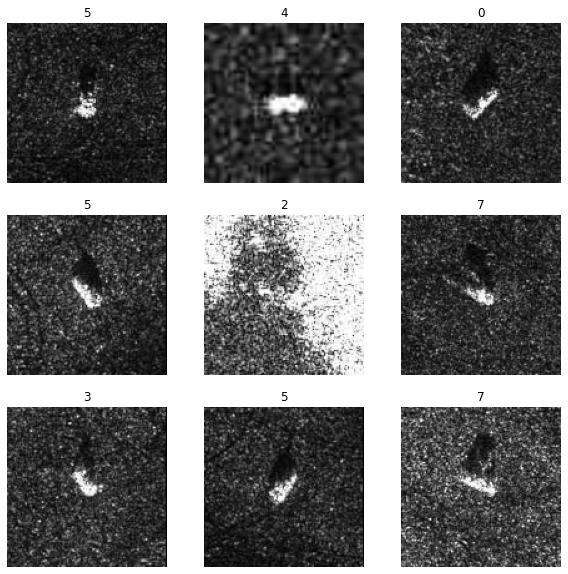

In [7]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"), cmap='gray')
        plt.title(np.argmax(labels[i]))
        plt.axis("off")

In [8]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
    ]
)

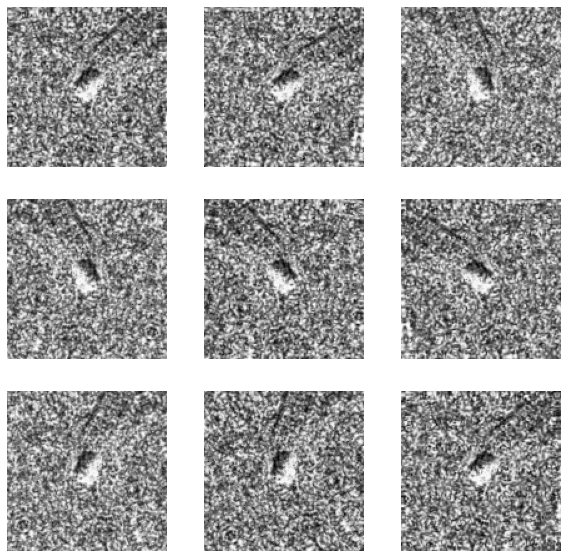

In [9]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"), cmap='gray')
        plt.axis("off")

In [10]:
train_ds = train_ds.prefetch(buffer_size=32)
val_ds = val_ds.prefetch(buffer_size=32)

In [11]:
metrics = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

In [12]:
model = keras.Sequential()

model.add(layers.InputLayer(input_shape=(128, 128, 1)))

model.add(layers.Flatten())

model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(100, activation='relu'))

model.add(layers.Dense(9, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 16384)             0         
_________________________________________________________________
dense (Dense)                (None, 100)               1638500   
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 9)                 909       
Total params: 1,659,609
Trainable params: 1,659,609
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=metrics)

In [14]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
265/265 [==============================] - 6s 15ms/step - loss: 56.4771 - tp: 4239.0000 - fp: 4208.0000 - tn: 63600.0000 - fn: 4237.0000 - accuracy: 0.8893 - precision: 0.5018 - recall: 0.5001 - auc: 0.7453 - prc: 0.3800 - val_loss: 2.5653 - val_tp: 1641.0000 - val_fp: 474.0000 - val_tn: 16478.0000 - val_fn: 478.0000 - val_accuracy: 0.9501 - val_precision: 0.7759 - val_recall: 0.7744 - val_auc: 0.9170 - val_prc: 0.7463
Epoch 2/10
265/265 [==============================] - 3s 13ms/step - loss: 4.0103 - tp: 6534.0000 - fp: 1921.0000 - tn: 65887.0000 - fn: 1942.0000 - accuracy: 0.9494 - precision: 0.7728 - recall: 0.7709 - auc: 0.9038 - prc: 0.7260 - val_loss: 2.3069 - val_tp: 1761.0000 - val_fp: 355.0000 - val_tn: 16597.0000 - val_fn: 358.0000 - val_accuracy: 0.9626 - val_precision: 0.8322 - val_recall: 0.8311 - val_auc: 0.9315 - val_prc: 0.7986
Epoch 3/10
265/265 [==============================] - 3s 13ms/step - loss: 3.8250 - tp: 6503.0000 - fp: 1958.0000 - tn: 65850.0000 - 

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D, InputLayer

CNN = Sequential()

CNN.add(layers.InputLayer(input_shape=(128, 128, 1)))

# Conv block 1.  You can add more conv steps to
# each block to increase model capacity.
CNN.add(Conv2D(filters=10, kernel_size=3, activation='relu', padding='same'))
# NN.add(Conv2D(filters=16, kernel_size=3, activation='relu', padding='same'))
CNN.add(MaxPooling2D())

# Conv block 2 - note we increase filter dimension as we move
# further into the network. You can add more conv steps to
# each block to increase model capacity.
CNN.add(Conv2D(filters=20, kernel_size=3, activation='relu', padding='same'))
# NN.add(Conv2D(filters=16, kernel_size=3, activation='relu', padding='same'))
CNN.add(MaxPooling2D())

# Conv block 3 - The conv blocks should be ended with either a flatten
# layer or a global pooling layer. These transform the 2D layers to 1D
# to match the following dense layers.
CNN.add(Conv2D(filters=30, kernel_size=3, activation='relu', padding='same'))

CNN.add(GlobalAveragePooling2D())

# Fully connected block - flattening followed by dense and output layers
# NN.add(Flatten())
CNN.add(Dense(20, activation='relu'))
CNN.add(Dense(9, activation='sigmoid'))

CNN.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 128, 128, 10)      100       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 64, 10)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 64, 64, 20)        1820      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 32, 20)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 30)        5430      
_________________________________________________________________
global_average_pooling2d_2 ( (None, 30)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 20)               

In [20]:
CNN.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=metrics)

In [22]:
cnn_hist = CNN.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
265/265 [==============================] - 4s 15ms/step - loss: 0.2736 - tp: 1332.0000 - fp: 105.0000 - tn: 67703.0000 - fn: 7144.0000 - accuracy: 0.9050 - precision: 0.9269 - recall: 0.1571 - auc: 0.7885 - prc: 0.3974 - val_loss: 0.2423 - val_tp: 448.0000 - val_fp: 2.0000 - val_tn: 16950.0000 - val_fn: 1671.0000 - val_accuracy: 0.9123 - val_precision: 0.9956 - val_recall: 0.2114 - val_auc: 0.8653 - val_prc: 0.4992
Epoch 2/10
265/265 [==============================] - 4s 15ms/step - loss: 0.2161 - tp: 2166.0000 - fp: 125.0000 - tn: 67683.0000 - fn: 6310.0000 - accuracy: 0.9156 - precision: 0.9454 - recall: 0.2555 - auc: 0.8926 - prc: 0.5796 - val_loss: 0.1740 - val_tp: 833.0000 - val_fp: 193.0000 - val_tn: 16759.0000 - val_fn: 1286.0000 - val_accuracy: 0.9224 - val_precision: 0.8119 - val_recall: 0.3931 - val_auc: 0.9474 - val_prc: 0.7166
Epoch 3/10
265/265 [==============================] - 4s 15ms/step - loss: 0.1659 - tp: 3696.0000 - fp: 682.0000 - tn: 67126.0000 - fn: 47

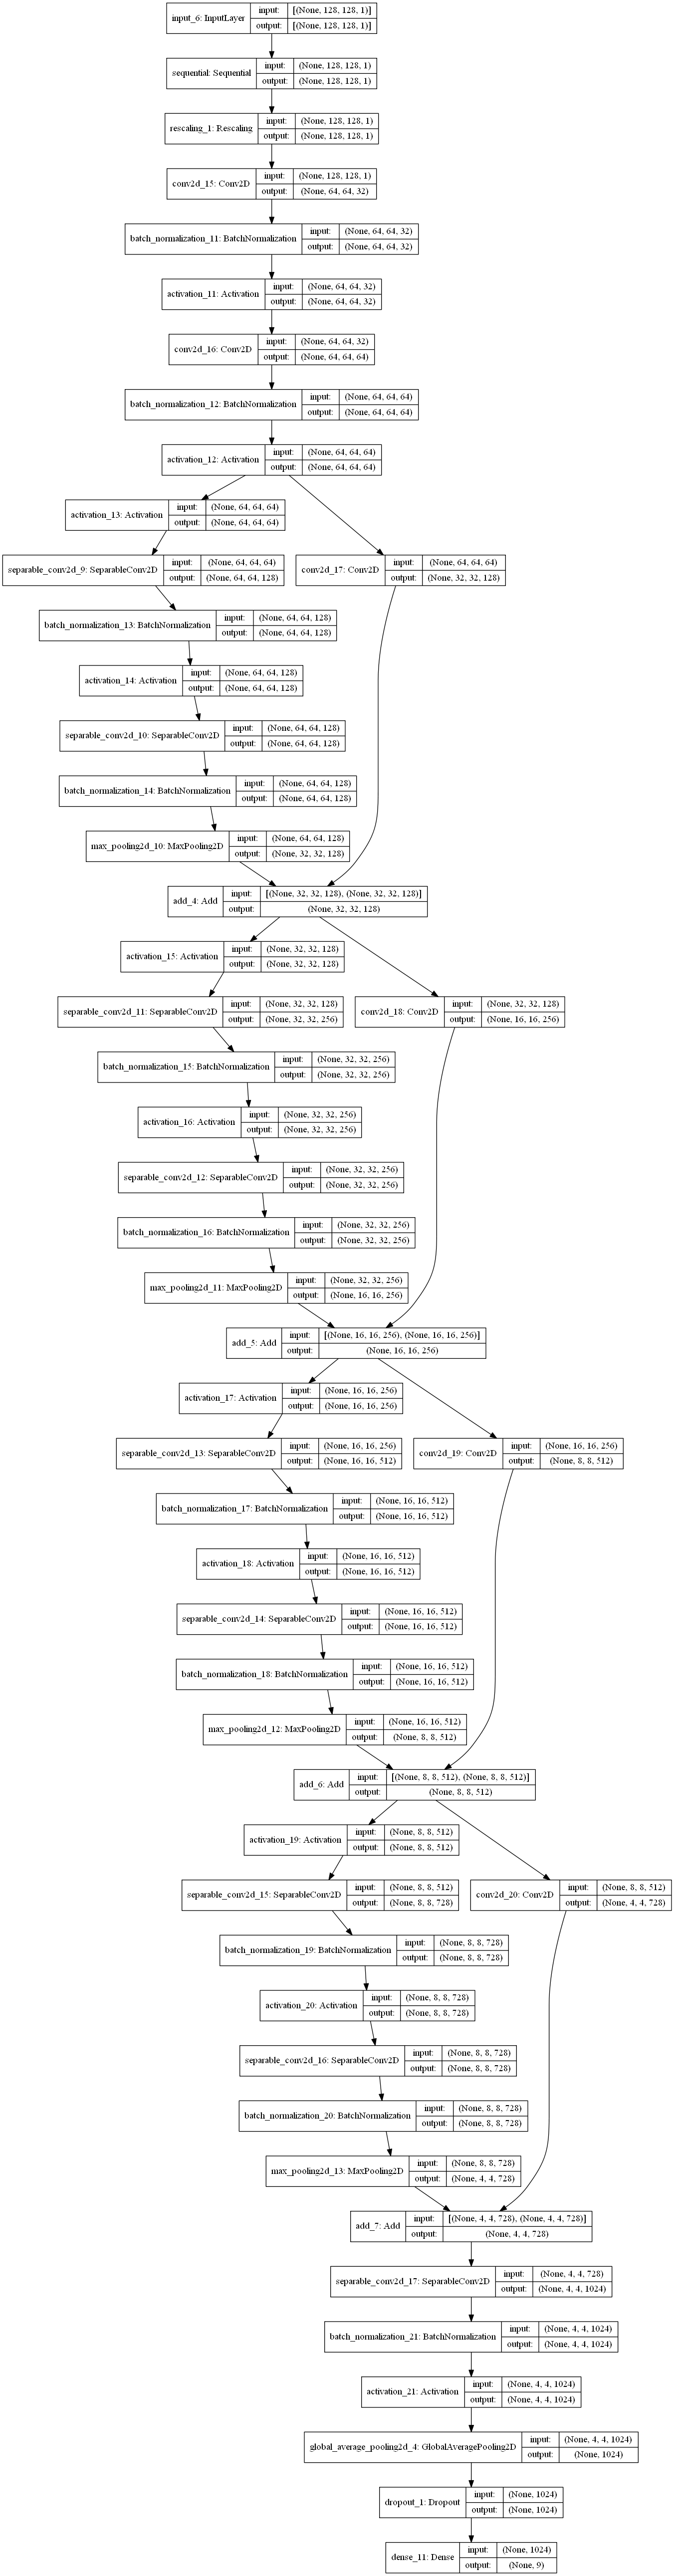

In [26]:
def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)
    # Image augmentation block
    x = data_augmentation(inputs)

    # Entry block
    x = layers.Rescaling(1.0 / 255)(x)
    x = layers.Conv2D(32, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.Conv2D(64, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    for size in [128, 256, 512, 728]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    x = layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.GlobalAveragePooling2D()(x)
    if num_classes == 2:
        activation = "sigmoid"
        units = 1
    else:
        activation = "softmax"
        units = num_classes

    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(units, activation=activation)(x)
    return keras.Model(inputs, outputs)


model = make_model(input_shape=image_size + (1,), num_classes=9)
keras.utils.plot_model(model, show_shapes=True)

In [27]:
epochs = 100

callbacks=[
        keras.callbacks.EarlyStopping(patience=8, verbose=1, restore_best_weights=True),
        keras.callbacks.ReduceLROnPlateau(factor=.5, patience=3, verbose=1),
    ]
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=metrics,
)
model.fit(
    train_ds, epochs=epochs, callbacks=callbacks, validation_data=val_ds,
)

Epoch 1/100
265/265 [==============================] - 36s 123ms/step - loss: 0.1543 - tp: 12594.0000 - fp: 2588.0000 - tn: 149756.0000 - fn: 6449.0000 - accuracy: 0.9473 - precision: 0.8295 - recall: 0.6613 - auc: 0.9620 - prc: 0.8333 - val_loss: 0.5846 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 16952.0000 - val_fn: 2119.0000 - val_accuracy: 0.8889 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5185 - val_prc: 0.2115
Epoch 2/100
265/265 [==============================] - 28s 105ms/step - loss: 0.0392 - tp: 7990.0000 - fp: 396.0000 - tn: 67412.0000 - fn: 486.0000 - accuracy: 0.9884 - precision: 0.9528 - recall: 0.9427 - auc: 0.9954 - prc: 0.9830 - val_loss: 1.0124 - val_tp: 288.0000 - val_fp: 1620.0000 - val_tn: 15332.0000 - val_fn: 1831.0000 - val_accuracy: 0.8190 - val_precision: 0.1509 - val_recall: 0.1359 - val_auc: 0.5228 - val_prc: 0.1349
Epoch 3/100
265/265 [==============================] - 29s 109ms/step - loss: 0.0250 - tp: 8183.0000 - fp: 258.0000